In [1]:
# ==============================
# TUGAS AKHIR 5 (TA-5)
# Nama  : Intan Terlaumbanua
# Nim  : 301230016
# Kelas : 5B Teknik Informatika
# Mata Kuliah : Machine Learning
# ===============================
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import joblib

In [2]:
# 1. Load dataset diabetes dari file CSV lokal
df = pd.read_csv('diabetes.csv')  # pastikan file 'diabetes.csv' ada di folder yang sama
print(df.head())

   kehamilan  glukosa  tekanan_darah  ketebalan_kulit  insulin   BMI  \
0          6      148             72               35        0  33.6   
1          1       85             66               29        0  26.6   
2          8      183             64                0        0  23.3   
3          1       89             66               23       94  28.1   
4          0      137             40               35      168  43.1   

   fungsi_silsilah_diabetes  usia  hasil  
0                     0.627    50      1  
1                     0.351    31      0  
2                     0.672    32      1  
3                     0.167    21      0  
4                     2.288    33      1  



=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   kehamilan                 768 non-null    int64  
 1   glukosa                   768 non-null    int64  
 2   tekanan_darah             768 non-null    int64  
 3   ketebalan_kulit           768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   fungsi_silsilah_diabetes  768 non-null    float64
 7   usia                      768 non-null    int64  
 8   hasil                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

=== Statistik Deskriptif ===


,kehamilan,glukosa,tekanan_darah,ketebalan_kulit,insulin,BMI,fungsi_silsilah_diabetes,usia,hasil
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



=== Jumlah Nilai yang Hilang per Kolom ===
kehamilan                   0
glukosa                     0
tekanan_darah               0
ketebalan_kulit             0
insulin                     0
BMI                         0
fungsi_silsilah_diabetes    0
usia                        0
hasil                       0
dtype: int64


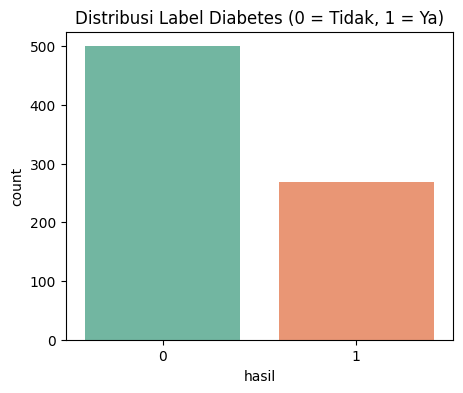

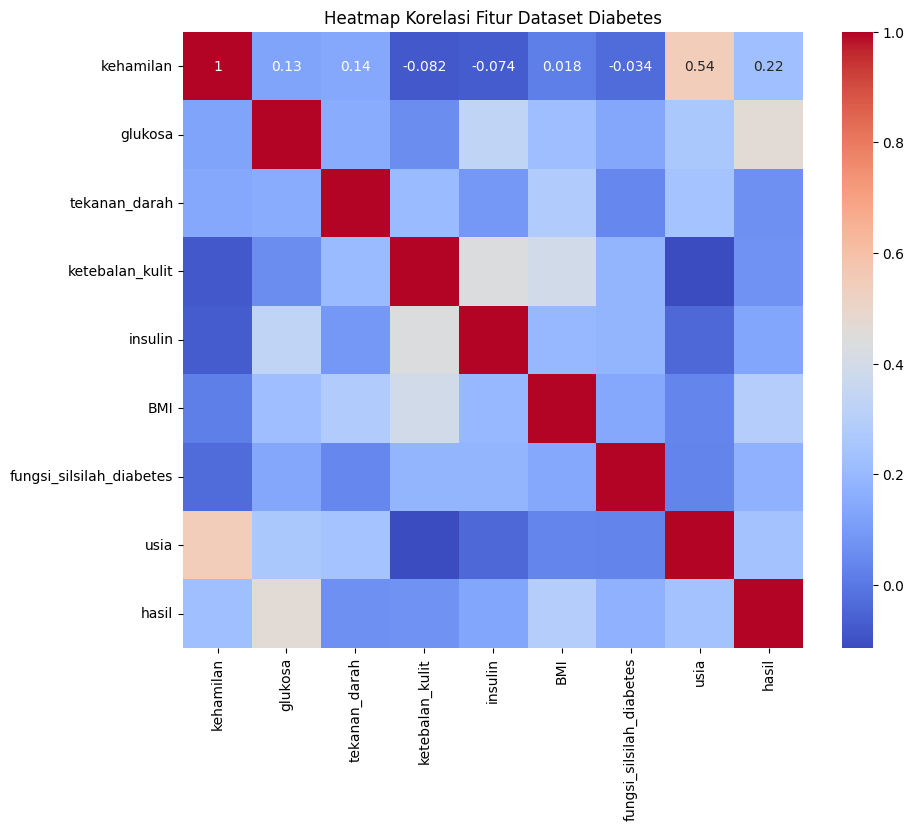

In [3]:
# 2. Eksplorasi Data (EDA)
print("\n=== Informasi Dataset ===")
print(df.info())

print("\n=== Statistik Deskriptif ===")
display(df.describe())

# Cek nilai yang hilang
print("\n=== Jumlah Nilai yang Hilang per Kolom ===")
print(df.isnull().sum())

# Visualisasi distribusi target
plt.figure(figsize=(5,4))
sns.countplot(x='hasil', data=df, palette='Set2')
plt.title("Distribusi Label Diabetes (0 = Tidak, 1 = Ya)")
plt.show()

# Korelasi antar fitur
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur Dataset Diabetes")
plt.show()

In [4]:
# ==============================================================
# 3. Pra-pemrosesan Data
# ==============================================================

# Baca dataset
data = pd.read_csv('diabetes.csv')

# Pilih fitur dan label
X = data[['kehamilan', 'glukosa', 'tekanan_darah', 'ketebalan_kulit',
          'insulin', 'BMI', 'fungsi_silsilah_diabetes', 'usia']]
y = data['hasil']

# Cek nilai kosong
print("=== Cek Nilai Kosong ===")
print(data.isnull().sum())

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("\n=== Jumlah Data Train dan Test ===")
print("Data Train:", X_train.shape[0])
print("Data Test :", X_test.shape[0])


=== Cek Nilai Kosong ===
kehamilan                   0
glukosa                     0
tekanan_darah               0
ketebalan_kulit             0
insulin                     0
BMI                         0
fungsi_silsilah_diabetes    0
usia                        0
hasil                       0
dtype: int64

=== Jumlah Data Train dan Test ===
Data Train: 537
Data Test : 231


In [5]:
# 4. Model A (Tanpa Batasan - Potensi Overfit)
model_A = DecisionTreeClassifier(random_state=42)
model_A.fit(X_train, y_train)
pred_A = model_A.predict(X_test)

print("\n=== Model A: Decision Tree Tanpa Batasan ===")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, pred_A))
print("\nClassification Report:")
print(classification_report(y_test, pred_A))


=== Model A: Decision Tree Tanpa Batasan ===

Confusion Matrix:
[[131  19]
 [ 36  45]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.83       150
           1       0.70      0.56      0.62        81

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231



In [6]:
# 5. Model B (Pruned - max_depth=3)
model_B = DecisionTreeClassifier(max_depth=3, random_state=42)
model_B.fit(X_train, y_train)
pred_B = model_B.predict(X_test)

print("\n=== Model B: Decision Tree dengan max_depth=3 ===")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, pred_B))
print("\nClassification Report:")
print(classification_report(y_test, pred_B))


=== Model B: Decision Tree dengan max_depth=3 ===

Confusion Matrix:
[[129  21]
 [ 42  39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       150
           1       0.65      0.48      0.55        81

    accuracy                           0.73       231
   macro avg       0.70      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231



In [7]:
# 6. Perbandingan Akurasi Model A dan Model B
acc_A = accuracy_score(y_test, pred_A)
acc_B = accuracy_score(y_test, pred_B)

print(f"\nAkurasi Model A (tanpa batasan): {acc_A:.4f}")
print(f"Akurasi Model B (max_depth=3): {acc_B:.4f}")

if acc_B < acc_A:
    print("Model A lebih akurat di data uji, namun bisa jadi overfitting.")
else:
    print("Model B lebih seimbang dan cocok dijadikan model final.")


Akurasi Model A (tanpa batasan): 0.7619
Akurasi Model B (max_depth=3): 0.7273
Model A lebih akurat di data uji, namun bisa jadi overfitting.


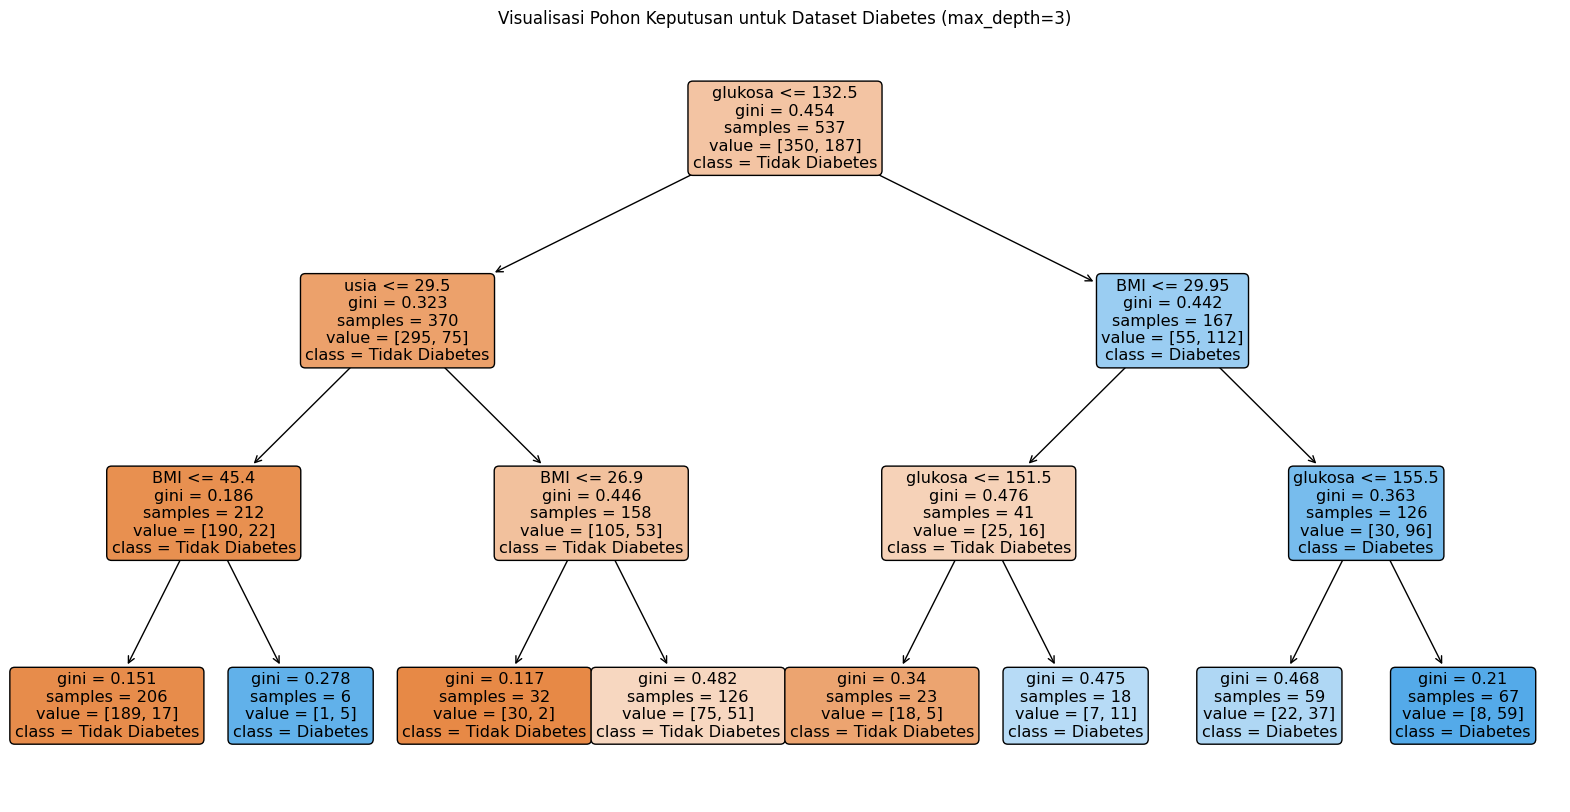

In [8]:
# 7. Visualisasi Pohon Keputusan
plt.figure(figsize=(20, 10))
plot_tree(model_B,
          feature_names=X.columns,
          class_names=['Tidak Diabetes', 'Diabetes'],
          filled=True, rounded=True)
plt.title("Visualisasi Pohon Keputusan untuk Dataset Diabetes (max_depth=3)")
plt.show()

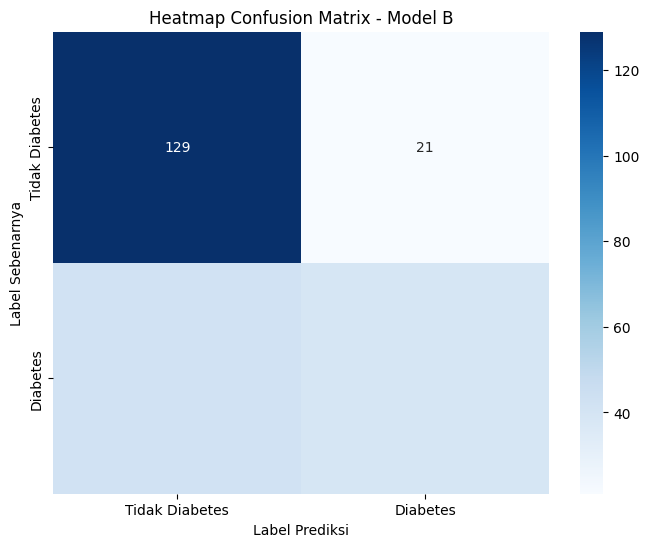

In [9]:
# 8. Confusion Matrix (Heatmap)
cm = confusion_matrix(y_test, pred_B)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Diabetes', 'Diabetes'],
            yticklabels=['Tidak Diabetes', 'Diabetes'])
plt.xlabel('Label Prediksi')
plt.ylabel('Label Sebenarnya')
plt.title('Heatmap Confusion Matrix - Model B')
plt.show()

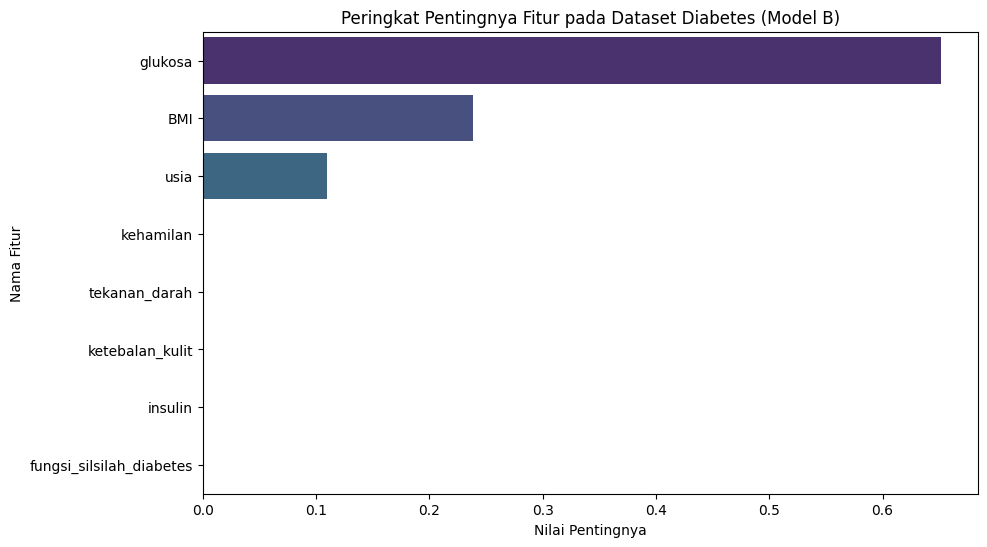

In [10]:
# 9. Feature Importance
importances = model_B.feature_importances_
feature_importance_df = pd.DataFrame({
    'Fitur': X_train.columns,
    'Pentingnya': importances
}).sort_values(by='Pentingnya', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Pentingnya', y='Fitur',
            data=feature_importance_df, palette='viridis')
plt.title('Peringkat Pentingnya Fitur pada Dataset Diabetes (Model B)')
plt.xlabel('Nilai Pentingnya')
plt.ylabel('Nama Fitur')
plt.show()


=== MODEL A: Decision Tree Default ===
              precision    recall  f1-score   support

           0       0.78      0.87      0.83       150
           1       0.70      0.56      0.62        81

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231

Akurasi Model A: 0.7619047619047619

=== MODEL B: Decision Tree (Tuning) ===
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       150
           1       0.64      0.53      0.58        81

    accuracy                           0.73       231
   macro avg       0.71      0.69      0.69       231
weighted avg       0.72      0.73      0.72       231

Akurasi Model B: 0.7316017316017316


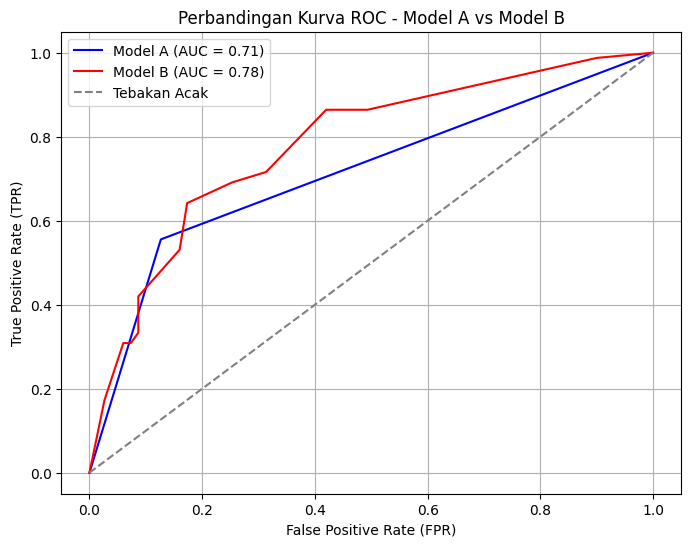

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import joblib

# ==============================================================  
# MODEL A: Decision Tree Default  
# ==============================================================  
model_A = DecisionTreeClassifier(random_state=42)
model_A.fit(X_train, y_train)
y_pred_A = model_A.predict(X_test)

print("\n=== MODEL A: Decision Tree Default ===")
print(classification_report(y_test, y_pred_A))
print("Akurasi Model A:", model_A.score(X_test, y_test))

y_pred_proba_A = model_A.predict_proba(X_test)[:, 1]
fpr_A, tpr_A, _ = roc_curve(y_test, y_pred_proba_A)
auc_A = roc_auc_score(y_test, y_pred_proba_A)

# ==============================================================  
# MODEL B: Decision Tree (Tuning)  
# ==============================================================  
model_B = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_split=5,
    random_state=42
)
model_B.fit(X_train, y_train)
y_pred_B = model_B.predict(X_test)

print("\n=== MODEL B: Decision Tree (Tuning) ===")
print(classification_report(y_test, y_pred_B))
print("Akurasi Model B:", model_B.score(X_test, y_test))

y_pred_proba_B = model_B.predict_proba(X_test)[:, 1]
fpr_B, tpr_B, _ = roc_curve(y_test, y_pred_proba_B)
auc_B = roc_auc_score(y_test, y_pred_proba_B)

# ==============================================================  
# Visualisasi Kurva ROC  
# ==============================================================  
plt.figure(figsize=(8, 6))
plt.plot(fpr_A, tpr_A, color='blue', label=f'Model A (AUC = {auc_A:.2f})')
plt.plot(fpr_B, tpr_B, color='red', label=f'Model B (AUC = {auc_B:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Tebakan Acak')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Perbandingan Kurva ROC - Model A vs Model B')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# 11. Interpretasi Aturan Pohon Keputusan (if-then rules)
aturan_pohon = export_text(model_B, feature_names=list(X.columns))
print("\n=== Aturan dari Model Decision Tree (Model B) ===")
print(aturan_pohon)


=== Aturan dari Model Decision Tree (Model B) ===
|--- glukosa <= 132.50
|   |--- usia <= 29.50
|   |   |--- BMI <= 45.40
|   |   |   |--- fungsi_silsilah_diabetes <= 0.51
|   |   |   |   |--- kehamilan <= 7.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- kehamilan >  7.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- fungsi_silsilah_diabetes >  0.51
|   |   |   |   |--- BMI <= 30.45
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- BMI >  30.45
|   |   |   |   |   |--- class: 0
|   |   |--- BMI >  45.40
|   |   |   |--- insulin <= 230.00
|   |   |   |   |--- class: 1
|   |   |   |--- insulin >  230.00
|   |   |   |   |--- class: 0
|   |--- usia >  29.50
|   |   |--- BMI <= 26.90
|   |   |   |--- BMI <= 9.65
|   |   |   |   |--- class: 1
|   |   |   |--- BMI >  9.65
|   |   |   |   |--- class: 0
|   |   |--- BMI >  26.90
|   |   |   |--- fungsi_silsilah_diabetes <= 0.56
|   |   |   |   |--- kehamilan <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- ke

In [18]:
# 12. Simpan Model dan Ringkasan Hasil
with open("model_summary.txt", "w") as f:
    f.write(f"Akurasi Model A (tanpa batasan): {acc_A:.4f}\n")
    f.write(f"Akurasi Model B (max_depth=3): {acc_B:.4f}\n")
    if acc_B >= acc_A:
        f.write("Model terbaik: Model B (max_depth=3)\n")
    else:
        f.write("Model terbaik: Model A (unpruned)\n")
    f.write(f"ROC AUC Model B: {auc_B:.4f}\n")  # ✅ ganti auc jadi auc_B
    f.write("\nAturan Pohon Keputusan (Model B):\n")
    f.write(aturan_pohon)
print("📄 Ringkasan hasil disimpan sebagai 'model_summary.txt'")

📄 Ringkasan hasil disimpan sebagai 'model_summary.txt'


In [19]:
# 13. Kesimpulan Akhir
print("\n=== KESIMPULAN ===")
print(f"Akurasi Model A: {acc_A:.4f}")
print(f"Akurasi Model B: {acc_B:.4f}")
if acc_B >= acc_A:
    print("Model B (max_depth=3) dipilih karena lebih seimbang dan memiliki generalisasi lebih baik.")
else:
    print("Model A lebih akurat, tetapi berisiko overfitting terhadap data latih.")


=== KESIMPULAN ===
Akurasi Model A: 0.7619
Akurasi Model B: 0.7273
Model A lebih akurat, tetapi berisiko overfitting terhadap data latih.
